In [18]:
import numpy as np
import pandas as pd

import sklearn as sk

from sklearn import datasets, model_selection

from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


# models and functions from scratch

from models.logistic_regression import LogisticRegression
from models.linear_discriminant_analysis import LDA
from models.support_vector_machine import SVM
from functions.functions import cross_validation, display_boundary

## 1) Importing marekting data

In [19]:
marketing_data = pd.read_excel("./data/marketing_data.xlsx")

## 2) Pré processing data

In [20]:
process_df = marketing_data.drop(
    columns=["Horodateur", "why_no_watch_user", "wanted_fonctionnalities"]
)

# One hot encoding
process_df["is_apple_user"] = process_df["is_apple_user"].map({"Oui": 1, "Non": 0})
process_df["is_connected_watch_user"] = process_df["is_connected_watch_user"].map(
    {"Oui, une Apple Watch": 1, "Oui , un autre type de montre": 1, "Non": 0}
)
process_df["is_sleep_tracking_user"] = process_df["is_sleep_tracking_user"].map(
    {"Oui.": 1, "Non, j'ai déjà utilisé mais j'ai arrêté.": 1, "Non, jamais.": 0}
)

# Label
process_df["new_sleeping_bracelet_desire"] = process_df[
    "new_sleeping_bracelet_desire"
].map({"Oui": 1, "Non": 0, "Peut-être": 3})
process_df = process_df.loc[process_df["new_sleeping_bracelet_desire"] != 3]

process_df["new_bracelet_purchase_willing"] = process_df[
    "new_bracelet_purchase_willing"
].map({"Oui": 1, "Non": 0})

process_df["new_watch_purchase_willing"] = process_df["new_watch_purchase_willing"].map(
    {
        "Oui": 1,
        "Non": 0,
        "Non, j'ai déjà une Apple Watch et améliorer mon réveil et mon sommeil ne suffirait pas à me faire changer": 0,
    }
)

process_df["age"] = process_df["age"].map(
    {
        "18-24 ans": 21,
        "Moins de 18 ans": 15,
        "25-34 ans": 29,
        "35-44 ans": 39,
        "45-54 ans": 49,
        "55-64 ans": 59,
        "65 ans ou plus": 75,
    }
)

process_df["man"] = 1
process_df["woman"] = 1
process_df["other"] = 1

process_df.loc[process_df["gender"] != "Homme", "man"] = 0
process_df.loc[process_df["gender"] != "Femme", "woman"] = 0
process_df.loc[process_df["gender"] != "Autre", "other"] = 0
process_df = process_df.drop(columns=["gender"])

process_df["student"] = 1
process_df["worker"] = 1
process_df["unemployed"] = 1
process_df["retired"] = 1

process_df.loc[process_df["professional_situation"] != "Etudiant(e)", "student"] = 0
process_df.loc[
    process_df["professional_situation"] != "Travailleur (-euse) actif (-ve)", "worker"
] = 0
process_df.loc[
    process_df["professional_situation"] != "Sans profession", "unemployed"
] = 0
process_df.loc[
    process_df["professional_situation"] != "Sans Retraité(e)", "retired"
] = 0
process_df = process_df.drop(columns=["professional_situation"])

process_df = process_df.astype(int)

## 3) Creating datasets

In [21]:
X_marketing = process_df.drop(columns=["new_sleeping_bracelet_desire"]).values
y_marketing = process_df["new_sleeping_bracelet_desire"].values

(
    X_train_marketing,
    X_test_marketing,
    y_train_marketing,
    y_test_marketing,
) = sk.model_selection.train_test_split(
    X_marketing, y_marketing, test_size=0.2, random_state=43
)

y_train_marketing_svm = np.where(y_train_marketing <= 0, -1, 1)
y_test_marketing_svm = np.where(y_test_marketing <= 0, -1, 1)

Xb_global_marketing = np.column_stack((X_marketing, np.ones(X_marketing.shape[0])))
Xb_marketing = np.column_stack((X_train_marketing, np.ones(X_train_marketing.shape[0])))
Xtb_marketing = np.column_stack((X_test_marketing, np.ones(X_test_marketing.shape[0])))

## 4) Training models

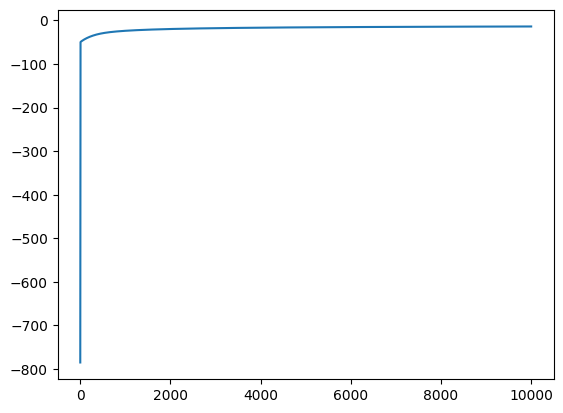

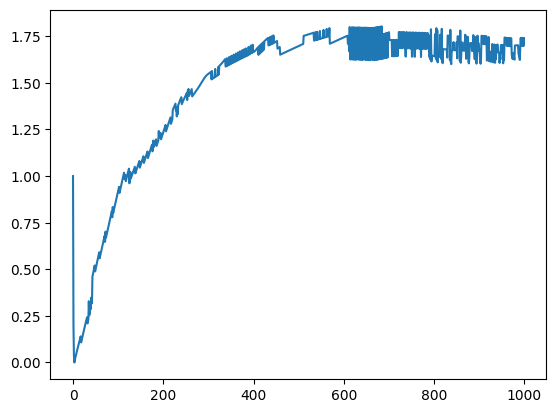

In [22]:
# Essayer de relancer si les taux d'erreur de la RL ne sont pas au 8-7% en appr et 5% en test

lr_marketing = LogisticRegression(eta=0.2e-3, stuck_criteria=1e-10)
loss_lr = lr_marketing.train(Xb_marketing, y_train_marketing)


lda_marketing = LDA()
lda_marketing.train(X_train_marketing, y_train_marketing)

svm_marketing = SVM(eta=9e-5, batch_size=16, epochs=1000)
loss_svm = svm_marketing.train(X_train_marketing, y_train_marketing)

plt.plot(loss_lr)
plt.figure()
plt.plot(loss_svm)

## 5) Comparing error rates

In [23]:
print("---- Régression Logistique ----")
print(
    f"Le taux d'erreur sur les données globales est de: {lr_marketing.error_rate(Xb_global_marketing, y_marketing) * 100:.2f}%"
)
print(
    f"Le taux d'erreur sur les données d'apprentissage est de: {lr_marketing.error_rate(Xb_marketing, y_train_marketing) * 100:.2f}%"
)
print(
    f"Le taux d'erreur sur les données test est de: {lr_marketing.error_rate(Xtb_marketing, y_test_marketing) * 100:.2f}%\n"
)

print("---- LDA ----")
print(
    f"Le taux d'erreur sur les données globales est de: {lda_marketing.error_rate(X_marketing, y_marketing) * 100:.2f}%"
)
print(
    f"Le taux d'erreur sur les données d'apprentissage est de: {lda_marketing.error_rate(X_train_marketing, y_train_marketing) * 100:.2f}%"
)
print(
    f"Le taux d'erreur sur les données test est de: {lda_marketing.error_rate(X_test_marketing, y_test_marketing) * 100:.2f}%\n"
)

print("---- SVM ----")
print(
    f"Le taux d'erreur sur les données globales est de: {svm_marketing.error_rate(X_marketing, y_marketing) * 100:.2f}%"
)
print(
    f"Le taux d'erreur sur les données d'apprentissage est de: {svm_marketing.error_rate(X_train_marketing, y_train_marketing) * 100:.2f}%"
)
print(
    f"Le taux d'erreur sur les données test est de: {svm_marketing.error_rate(X_test_marketing, y_test_marketing) * 100:.2f}%\n"
)

---- Régression Logistique ----
Le taux d'erreur sur les données globales est de: 7.14%
Le taux d'erreur sur les données d'apprentissage est de: 7.46%
Le taux d'erreur sur les données test est de: 5.88%

---- LDA ----
Le taux d'erreur sur les données globales est de: 9.52%
Le taux d'erreur sur les données d'apprentissage est de: 10.45%
Le taux d'erreur sur les données test est de: 5.88%

---- SVM ----
Le taux d'erreur sur les données globales est de: 13.10%
Le taux d'erreur sur les données d'apprentissage est de: 13.43%
Le taux d'erreur sur les données test est de: 11.76%



## 6) Leave one out cross validation

In [24]:
# Temps d'exécution: 2-3 min
# Valeurs en générale
# ---- Régression Logistique ----
# Taux d'erreur: 17.91%

# ---- LDA ----
# Taux d'erreur: 14.93%

# ---- SVM ----
# Taux d'erreur: 14.93%

print("---- Régression Logistique ----")
print(
    f"Taux d'erreur: {cross_validation(Xb_marketing, y_train_marketing, lr_marketing) * 100:.2f}%\n"
)

print("---- LDA ----")
print(
    f"Taux d'erreur: {cross_validation(X_train_marketing, y_train_marketing, lda_marketing) * 100:.2f}%\n"
)

print("---- SVM ----")
print(
    f"Taux d'erreur: {cross_validation(X_train_marketing, y_train_marketing, svm_marketing) * 100:.2f}%\n"
)

---- Régression Logistique ----
